In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

[2.145]
[-2.145]


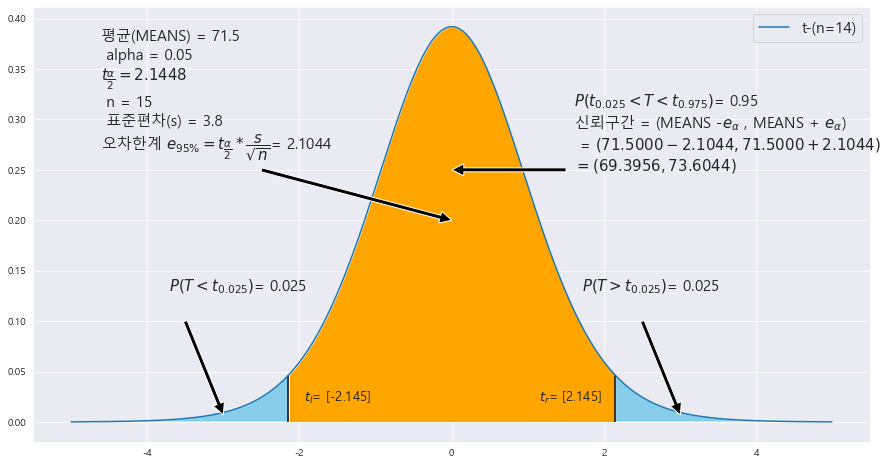

In [2]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))




# A = [3.1 , 1.9 , 2.4 , 2.8 , 2.9 , 3.0 , 2.8 , 2.3, 2.2 , 2.6]

MEANS = 71.5
STDS = 3.8




n = 15 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .27, f'평균(MEANS) = {MEANS}\n alpha = {round(1-area,4)}\n' + r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r +f'\n n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')

plt.annotate('' , xy=(3.0, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-3.0, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.text(1.71 , .13, r'$P(T>t_{%.3f})$' % trust + f'= {round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$P(T<t_{%.3f})$' % trust + f'= {round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)





b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[40, 30, 70, 60, 50, 60, 60, 30, 40, 50, 90, 60, 50, 30, 30]
[2.145]
[-2.145]


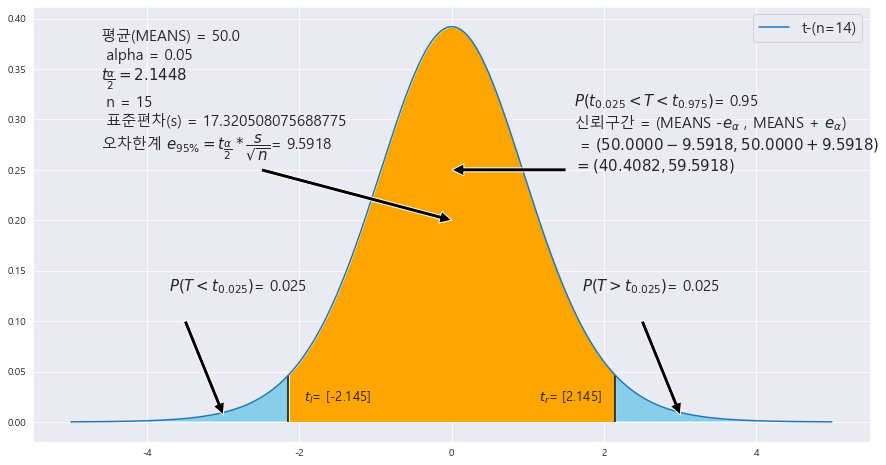

In [3]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))




A = "40 30 70 60 50 60 60 30 40 50 90 60 50 30 30"
A = list(map(int , A.split(' ')))
print(A)
MEANS = np.mean(A)
STDS = np.std(A , ddof=1)




n = len(A) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .27, f'평균(MEANS) = {MEANS}\n alpha = {round(1-area,4)}\n' + r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r +f'\n n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')

plt.annotate('' , xy=(3.0, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-3.0, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.text(1.71 , .13, r'$P(T>t_{%.3f})$' % trust + f'= {round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$P(T<t_{%.3f})$' % trust + f'= {round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)





b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[40, 30, 70, 60, 50, 60, 60, 30, 40, 50, 90, 60, 50, 30, 30]
[1.761]
[-1.761]
-2.2361


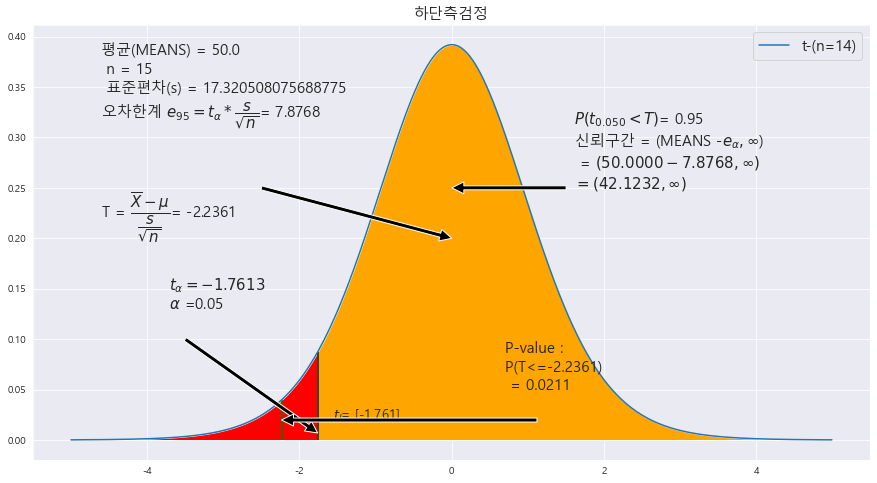

In [16]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


A = "40 30 70 60 50 60 60 30 40 50 90 60 50 30 30"
A = list(map(int , A.split(' ')))
print(A)
MEANS = np.mean(A)
STDS = np.std(A , ddof=1)




n = len(A) #표본개수
dof_2 = [n-1] #자유도c

MO_MEAN = 60

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('하단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=-t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(1- scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha} , \infty$)' +f'\n' + r' = $({%.4f} - {%.4f} , \infty)$' % (MEANS, E)  +f'\n' +r'$ = ({%.4f} , \infty)$' % (MEANS-E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0.7, annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.1, 2.2, 1.5, 1.7, 2.0, 1.6, 1.7, 1.5, 2.4, 1.6, 2.5, 1.9]
[2.718]
[-2.718]
-1.0796


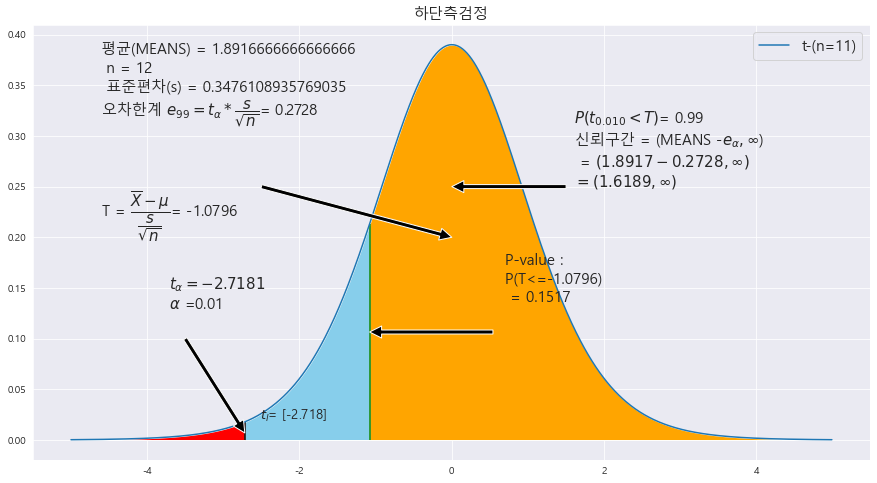

In [17]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


A = "2.1 2.2 1.5 1.7 2.0 1.6 1.7 1.5 2.4 1.6 2.5 1.9"
A = list(map(float , A.split(' ')))
print(A)
MEANS = np.mean(A)
STDS = np.std(A , ddof=1)




n = len(A) #표본개수
dof_2 = [n-1] #자유도c

MO_MEAN = 2

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 99 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('하단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=-t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(1- scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha} , \infty}$)' +f'\n' + r' = $({%.4f} - {%.4f}, \infty)$' % (MEANS, E )  +f'\n' +r'$ = ({%.4f} , \infty)$' % (MEANS-E )  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0.7, annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.262]
[-2.262]
-2.5298


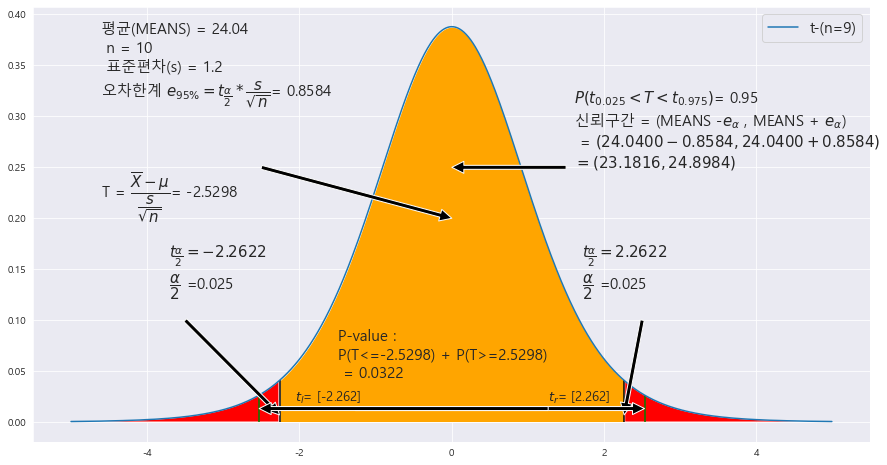

In [12]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))



# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 24.04
STDS = 1.2
MO_MEAN = 25



n = 10 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[3.25]
[-3.25]
-2.5298


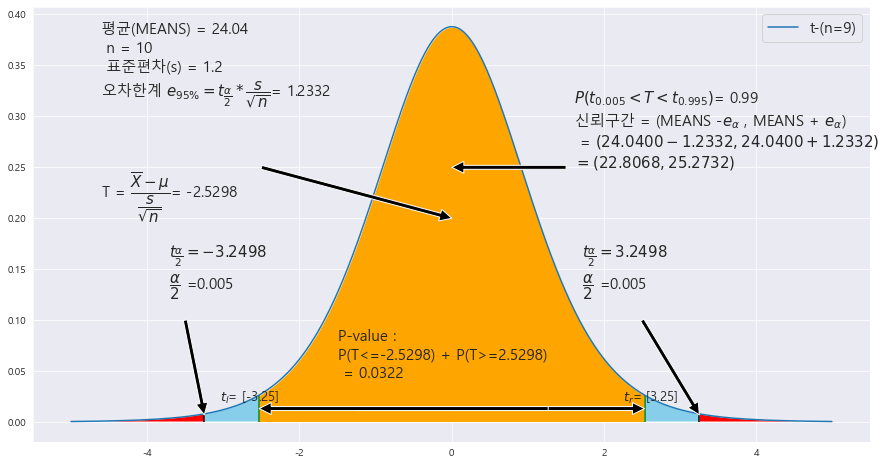

In [13]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))



# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 24.04
STDS = 1.2
MO_MEAN = 25



n = 10 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 99 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.262]
[-2.262]
-2.5298


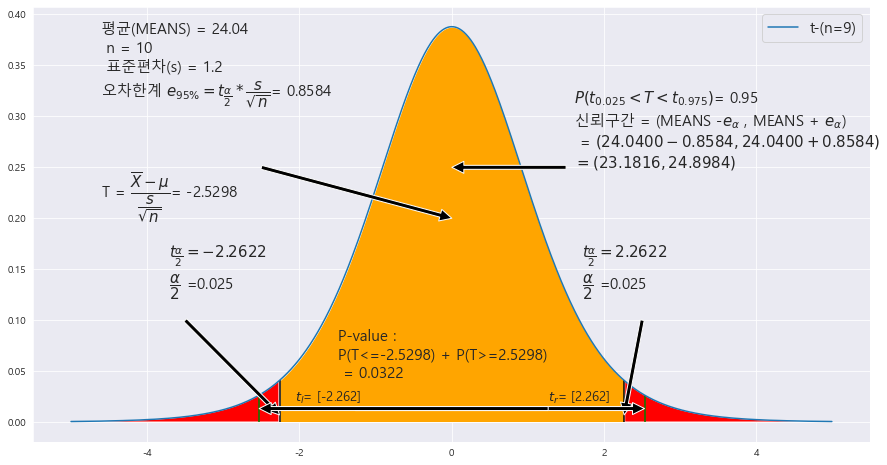

In [14]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))



# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 24.04
STDS = 1.2
MO_MEAN = 25



n = 10 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.086]
[-2.086]
2.8641


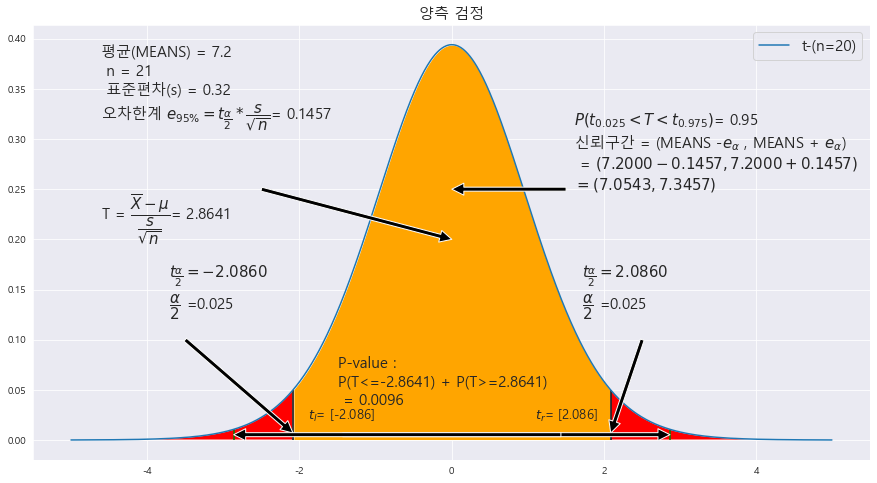

In [20]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))



# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 7.2
STDS = 0.32
MO_MEAN = 7



n = 21 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)


ax.set_title('양측 검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[53.0, 47.0, 68.0, 62.0, 65.0, 65.0, 68.0, 65.0, 64.0, 56.0, 68.0, 76.0, 55.0, 63.0, 56.0, 62.0, 69.0, 60.0, 62.0, 60.0]
[1.729]
[-1.729]
1.4984


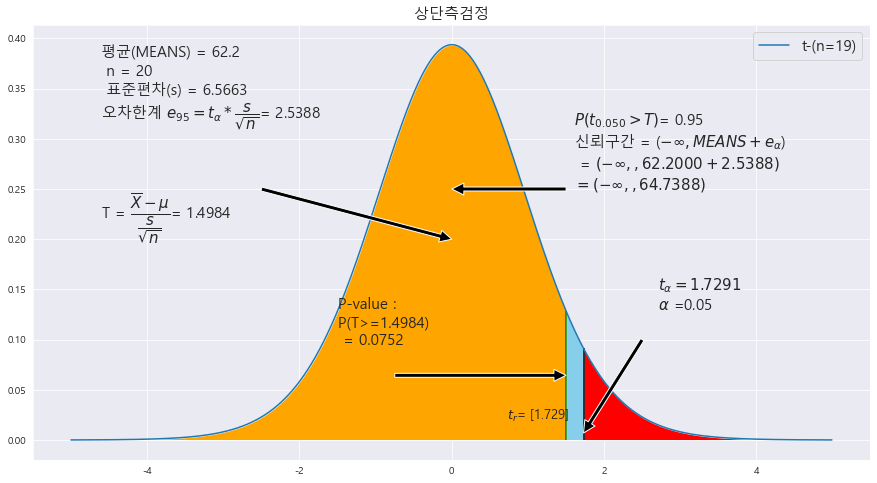

In [22]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
A = "53 47 68 62 65 65 68 65 64 56 68 76 55 63 56 62 69 60 62 60"
A = list(map(float, A.split(' ')))
print(A)

MEANS = round(np.mean(A) , 4)
STDS = round(np.std(A , ddof =1 ) ,4)
MO_MEAN = 60


n = len(A) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('상단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = ($-\infty, MEANS + e_{\alpha}$)' +f'\n' + r' = $(-\infty, , {%.4f} + {%.4f})$' % ( MEANS , E)  +f'\n' +r'$ = (-\infty, , {%.4f})$' % ( MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[1.833]
[-1.833]
1.3237


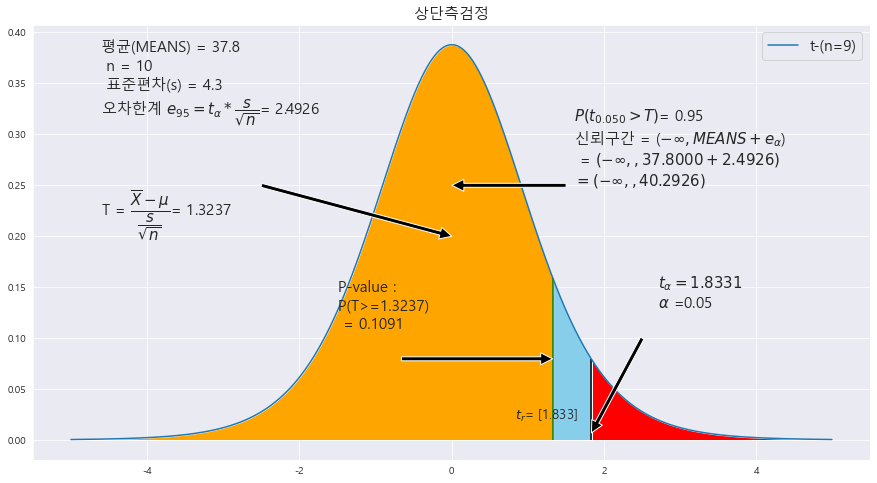

In [26]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "53 47 68 62 65 65 68 65 64 56 68 76 55 63 56 62 69 60 62 60"
# A = list(map(float, A.split(' ')))
# print(A)

MEANS = 37.8
STDS = 4.3
MO_MEAN = 36


n = 10 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('상단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = ($-\infty, MEANS + e_{\alpha}$)' +f'\n' + r' = $(-\infty, , {%.4f} + {%.4f})$' % ( MEANS , E)  +f'\n' +r'$ = (-\infty, , {%.4f})$' % ( MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

In [25]:
print( (37.8-36) / (4.3/math.sqrt(10)))

1.3237441368146685
